# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

50000
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


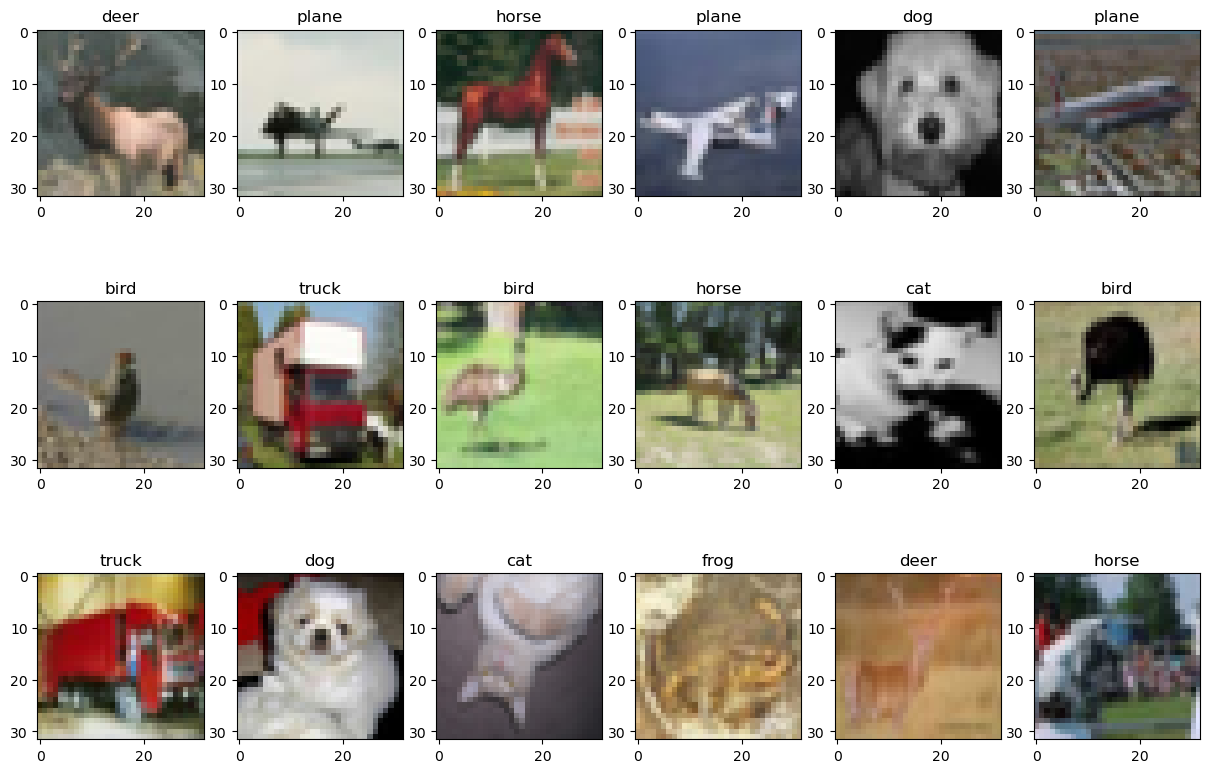

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]
num_pictures = len(x_train)
print(num_pictures)
print(y_train)
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(1,num_pictures)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


(Text(0.5, 0, 'Class'), Text(0, 0.5, 'Counts'))

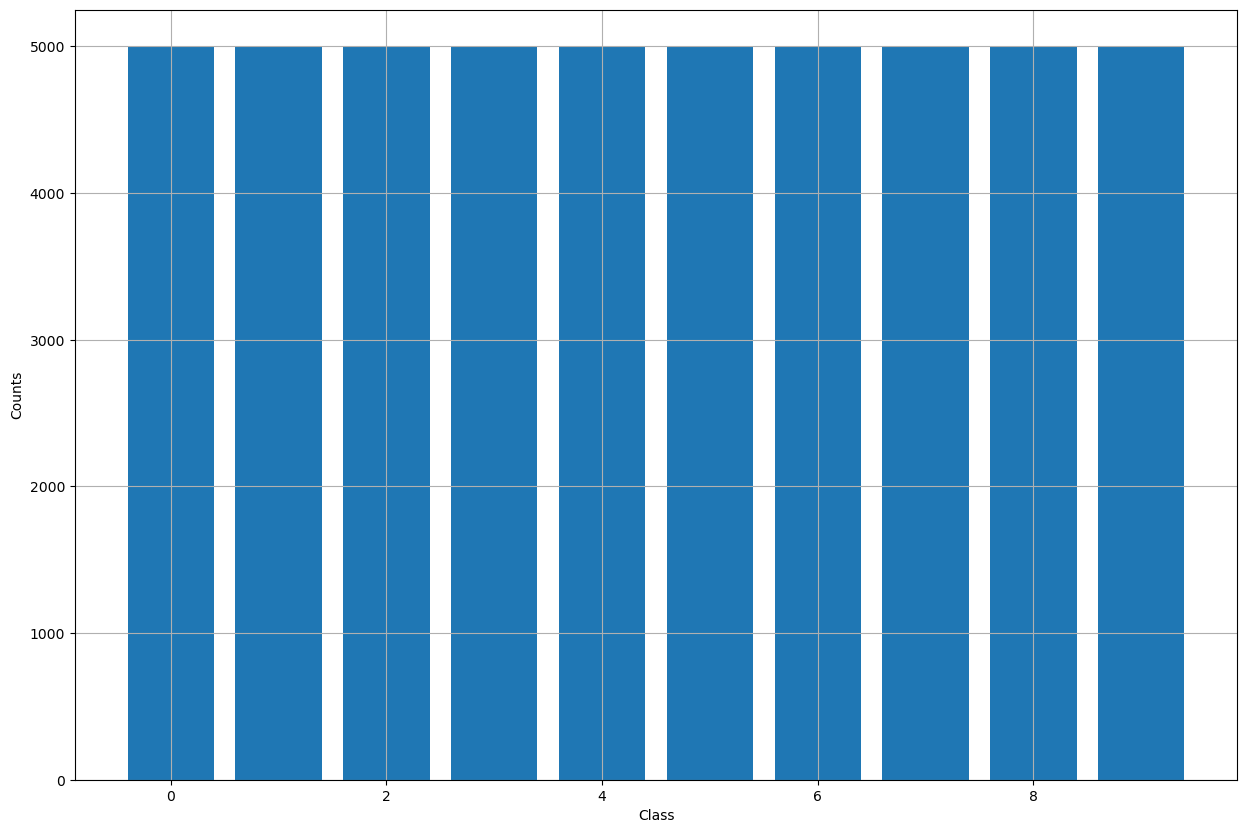

In [4]:
# Compute the class histogram
import pandas as pd


df = pd.DataFrame (y_train);

ids = df.iloc[:]

from collections import Counter
hist = Counter(df[0])


print(hist)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Class'), plt.ylabel('Counts')


### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [5]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

# Normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)


# Spiltting training and validation sets

x_val = x_train[:10000]
y_val = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]


Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [21]:
print(x_train[0][0])

[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.51372549 0.39215686]
 [0.65882353 0.53333333 0.42352941]
 [0.62352941 0.50588235 0.4 

### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [22]:
inputs = Input(shape=(size, size, 3))


#net = Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)



net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0   

### Step 3: Training

Compile the model and train it.

In [23]:
epochs = 25
batch_size = 128

# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
# Train the model
#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


print('Elapsed time', time() - start)

Epoch 1/25
391/391 [==============================] - 12s 31ms/step - loss: 1.6450 - accuracy: 0.4139 - val_loss: 1.4257 - val_accuracy: 0.4845
Epoch 2/25
391/391 [==============================] - 16s 40ms/step - loss: 1.2982 - accuracy: 0.5482 - val_loss: 1.2456 - val_accuracy: 0.5565
Epoch 3/25
391/391 [==============================] - 16s 41ms/step - loss: 1.1805 - accuracy: 0.5895 - val_loss: 1.1643 - val_accuracy: 0.5932
Epoch 4/25
391/391 [==============================] - 16s 41ms/step - loss: 1.0979 - accuracy: 0.6179 - val_loss: 1.1217 - val_accuracy: 0.6081
Epoch 5/25
391/391 [==============================] - 16s 40ms/step - loss: 1.0423 - accuracy: 0.6392 - val_loss: 1.0806 - val_accuracy: 0.6252
Epoch 6/25
391/391 [==============================] - 15s 37ms/step - loss: 1.0045 - accuracy: 0.6541 - val_loss: 1.0101 - val_accuracy: 0.6524
Epoch 7/25
391/391 [==============================] - 14s 37ms/step - loss: 0.9604 - accuracy: 0.6692 - val_loss: 1.0352 - val_accuracy:

Train Acc      0.7613999843597412
Validation Acc 0.6934999823570251


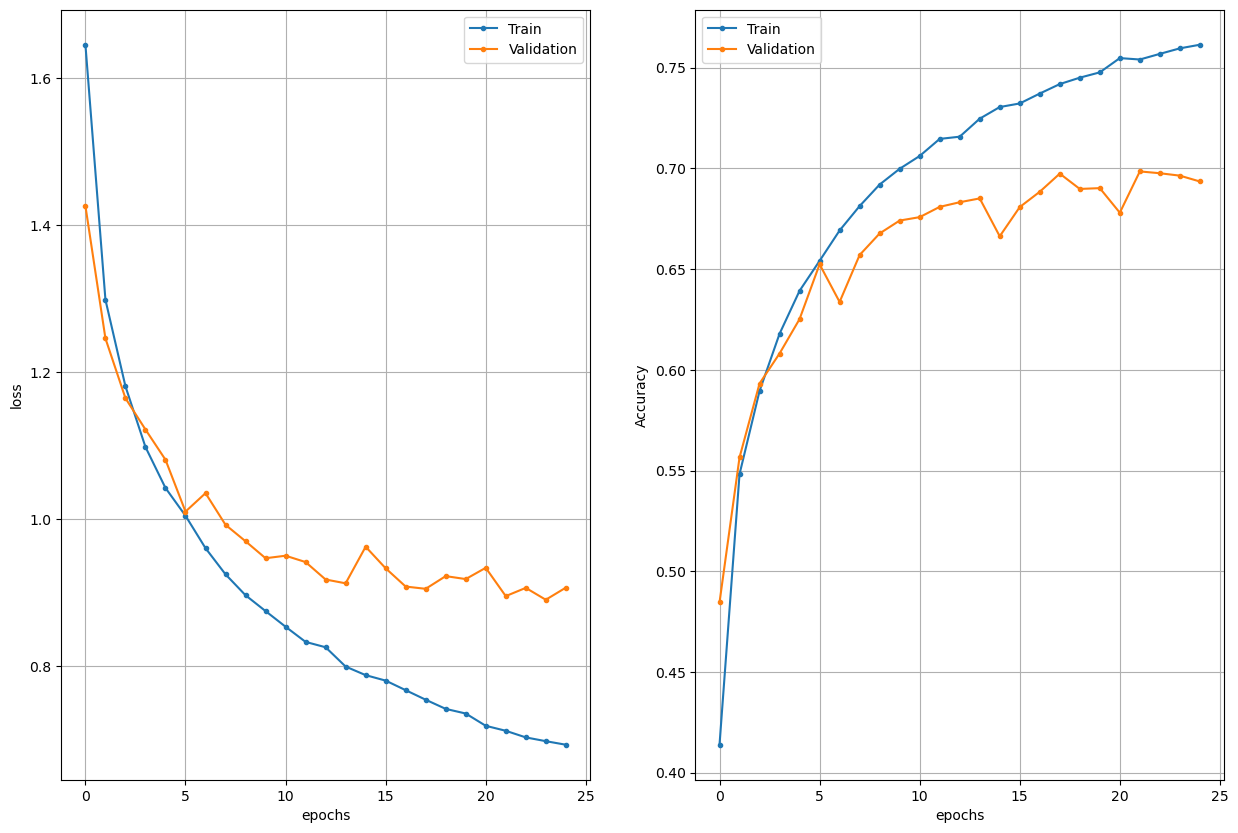

In [24]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [27]:
# Compute the labels and the predictions as sparse values
#y_true = 
#y_pred =

y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
#print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 2s 7ms/step
True [3 8 8 0 6]
Pred [3 1 8 8 6]
Pred [[3.9523514e-04 7.5251346e-06 1.6797717e-04 8.1746721e-01 3.5930090e-04
  9.4800293e-02 2.0890826e-02 5.6886318e-05 6.5508842e-02 3.4585706e-04]
 [9.0156319e-03 8.4208131e-01 9.7518284e-07 2.8097306e-08 6.8544592e-09
  1.6502533e-08 9.8394302e-08 2.4467484e-08 1.4735247e-01 1.5493511e-03]
 [2.5167882e-01 1.8306084e-01 8.5149780e-03 1.1135399e-02 1.8625889e-03
  3.7822840e-04 8.1998116e-04 6.4337803e-03 4.1320997e-01 1.2290538e-01]
 [4.1804677e-01 3.6395062e-03 1.0479460e-02 2.5087484e-04 8.5146102e-04
  3.3957365e-06 9.0836969e-05 7.7160374e-05 5.6605923e-01 5.0122215e-04]
 [3.3591886e-07 1.0102219e-05 4.2003760e-04 7.3652170e-03 4.9501589e-01
  8.1400556e-04 4.9634755e-01 1.1788909e-06 7.6070473e-06 1.7975313e-05]]
(10000, 10)


In [28]:
ev = model.evaluate(x_test, y_test)

print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.9067 - accuracy: 0.6935
Test loss   0.90669846534729
Test metric 0.6934999823570251


In [ ]:
# Compute and print the accuracy for each class




for class_id, class_name in classes.items():
         class_total = y_true[i, :].sum()
        class_correct = y_pred[i, i]   


    acc = 100 * float(correct_count) / total_pred[class_id]
    print(class_name, acc)

In [ ]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

In [ ]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx =
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?

Train Acc      0.7613999843597412
Validation Acc 0.6934999823570251


* What modifications would you do in order to improve the classification accuracy?

Let's add one more Convolution layer and run again
Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(net)
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?


In [6]:
inputs = Input(shape=(size, size, 3))


#net = Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)



net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = Flatten()(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496 

In [7]:
epochs = 25
batch_size = 128

# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
# Train the model
#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


print('Elapsed time', time() - start)

Epoch 1/25
313/313 [==============================] - 16s 49ms/step - loss: 1.6277 - accuracy: 0.4160 - val_loss: 1.3510 - val_accuracy: 0.5187
Epoch 2/25
313/313 [==============================] - 24s 76ms/step - loss: 1.2850 - accuracy: 0.5457 - val_loss: 1.2095 - val_accuracy: 0.5730
Epoch 3/25
313/313 [==============================] - 26s 85ms/step - loss: 1.1272 - accuracy: 0.6053 - val_loss: 1.1451 - val_accuracy: 0.5991
Epoch 4/25
313/313 [==============================] - 19s 61ms/step - loss: 1.0267 - accuracy: 0.6389 - val_loss: 1.0599 - val_accuracy: 0.6277
Epoch 5/25
313/313 [==============================] - 19s 61ms/step - loss: 0.9425 - accuracy: 0.6724 - val_loss: 0.9944 - val_accuracy: 0.6510
Epoch 6/25
313/313 [==============================] - 18s 58ms/step - loss: 0.8782 - accuracy: 0.6961 - val_loss: 0.9326 - val_accuracy: 0.6743
Epoch 7/25
313/313 [==============================] - 19s 59ms/step - loss: 0.8339 - accuracy: 0.7114 - val_loss: 0.9219 - val_accuracy:

Train Acc      0.8911749720573425
Validation Acc 0.7150999903678894


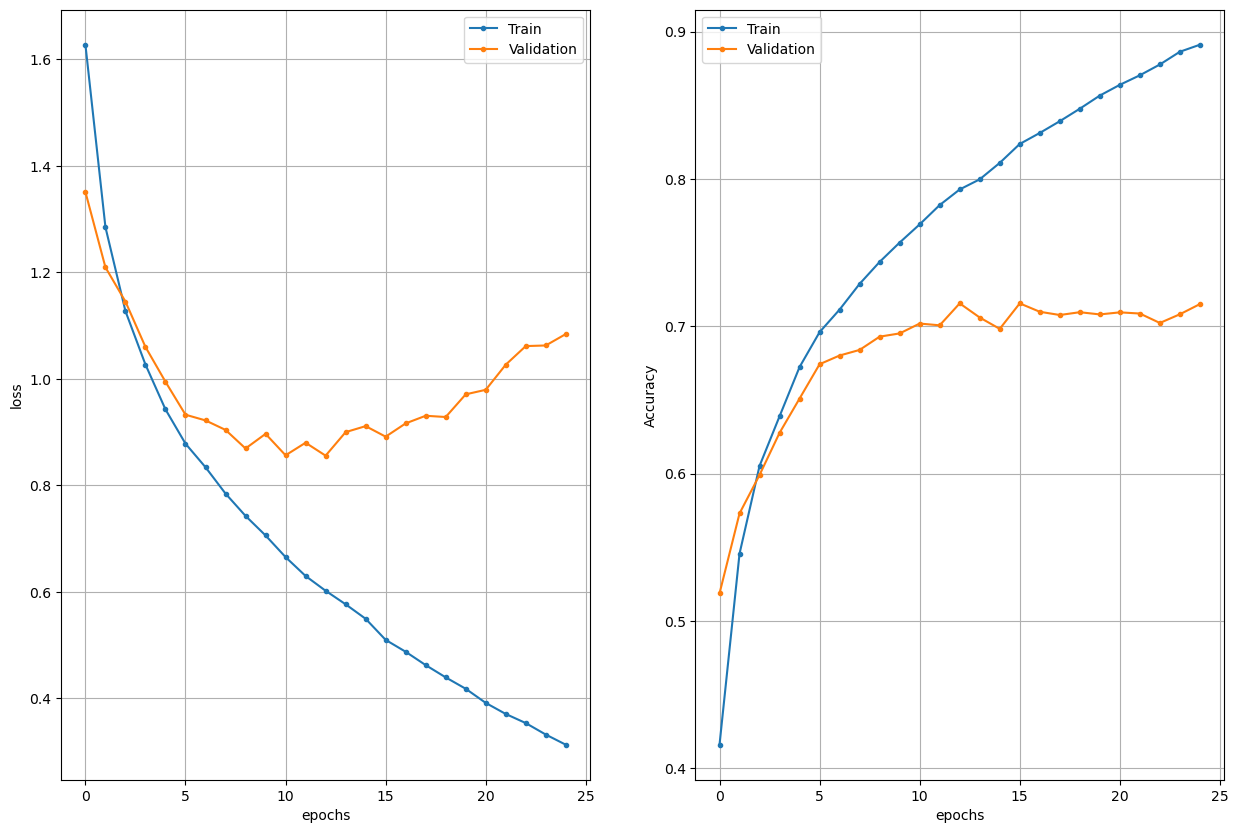

In [8]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1]) 

* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

It is improved from 69% to 71%

Train Acc      0.8911749720573425
Validation Acc 0.7150999903678894